Задание 1 - Загрузите файл HR.csv в pandas dataframe

In [109]:
import pandas as pd
import numpy as np

df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Задание 2 - Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс, сред.отклонение)

In [47]:
### Можно их увидеть просто через метод describe()
df.describe()

### Либо сделать это вручную
headers_list = df.columns.tolist() ### Лист аттрибутов по которым буду вычислять основные статистики

stat_note = {                      ### Словарь с основноыми статистиками
    "attribute" : [],
    "mean" : [],
    "median" : [],
    "mode" : [],
    "min" : [],
    "max" : [],
    "std" : [],                    ### Cтандартное отклонение (в задании опечатка?)
    "abs mean": []                 ### Среднее абсолютное отклонение
}

for attribute in headers_list:
  stat_note['attribute'].append(attribute)
  if df[attribute].dtype in ['int64', 'float64']:         ### Проверка числовые ли значения в столбце
    stat_note['mean'].append(df[attribute].mean())
    stat_note['median'].append(df[attribute].median())
    stat_note['mode'].append(df[attribute].mode()[0])
    stat_note['min'].append(df[attribute].min())
    stat_note['max'].append(df[attribute].max())
    stat_note['std'].append(df[attribute].std())
    stat_note['abs mean'].append(  (df[attribute] - df[attribute].mean()).abs().mean()  )
  else:
    stat_note['mean'].append(None)
    stat_note['median'].append(None)
    stat_note['mode'].append(df[attribute].mode()[0])
    stat_note['min'].append(None)
    stat_note['max'].append(None)
    stat_note['std'].append(None)
    stat_note['abs mean'].append(None)

stat_note_df = pd.DataFrame(stat_note)

stat_note_df.head(10)

,attribute,mean,median,mode,min,max,std,abs mean
0,satisfaction_level,0.612834,0.64,0.1,0.09,1.0,0.248631,0.206911
1,last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.171169,0.150389
2,number_project,3.803054,4.00,4,2.00,7.0,1.232592,1.008344
3,average_montly_hours,201.050337,200.00,135,96.00,310.0,49.943099,43.671320
4,time_spend_company,3.498233,3.00,3,2.00,10.0,1.460136,1.076123
5,Work_accident,0.144610,0.00,0,0.00,1.0,0.351719,0.247395
6,left,0.238083,0.00,0,0.00,1.0,0.425924,0.362798
7,promotion_last_5years,0.021268,0.00,0,0.00,1.0,0.144281,0.041632
8,department,NaN,NaN,sales,NaN,NaN,NaN,NaN
9,salary,NaN,NaN,low,NaN,NaN,NaN,NaN


Задание 3 - Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

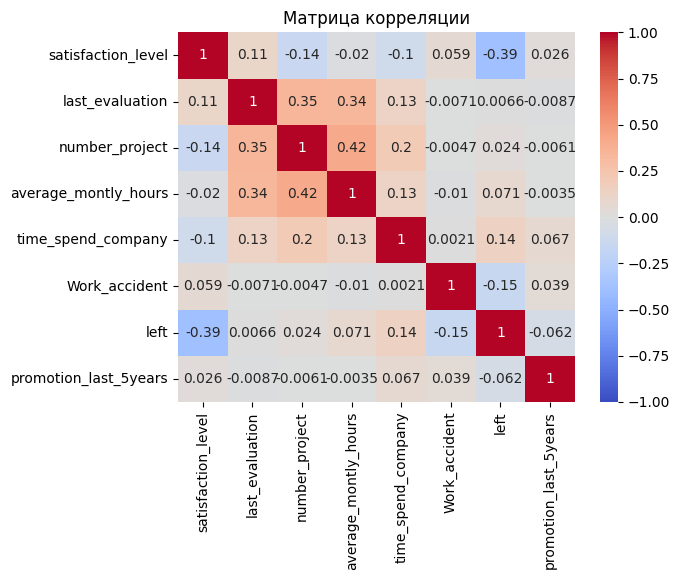

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[headers_list[:8]].corr()
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1)
plt.title("Матрица корреляции")
plt.show()

### 1 самая скоррегированная пара - average_monthly_hours и number_project (к. кореляции - 0.42) - чем больше проектов, тем дольше остаётся на работе
### 2 сама скоррегированная пара - left и satisfaction_level (к. корреляции -  -0.39) - обратная но относительно сильная корреляция - чем меньше уровень удовлетворенности тем вероятнее сотрудник уволится

### 1я Самая нескоррегированная пара - time_spend_company и work_accident (к. корреляции 0.0021 - близок к 0)
### 2я Самая нескоррегированная пара - average_monthly_hours и promotion_last_5years (кю корреляции -0.0035)

Задание 4 - Рассчитайте сколько сотрудников работает в каждом
департаменте.


In [90]:
### Можно посмотреть с помощью value_counts
print(df['department'].value_counts())

### Или рассчитать вручную
deps = df['department'].unique()

dep_emp_counter = {}
for dep in deps:
  dep_emp_counter[dep] = (df['department'] == dep).sum()

print()
print('Вручную:')
print("\n".join(f"{k}: {v}" for k, v in dep_emp_counter.items()))

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

Вручную:
sales: 4140
accounting: 767
hr: 739
technical: 2720
support: 2229
management: 630
IT: 1227
product_mng: 902
marketing: 858
RandD: 787


Задание 5 - Показать распределение сотрудников по зарплатам.

In [94]:
### Можно с помощью value_counts()
print(df['salary'].value_counts())

### Или рассчитать вручную
salary = df['salary'].unique()

salary_emp_counter = {}
for sale in salary:
  salary_emp_counter[sale] = (df['salary'] == sale).sum()

print()
print('Вручную:')
print("\n".join(f"{k}: {v}" for k, v in salary_emp_counter.items()))

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

Вручную:
low: 7316
medium: 6446
high: 1237


Задание 6 - показать распределение сотрудников по зарплатам в каждом департаменте

In [105]:
data = []
for dep in deps:
  filtered_df = df[df['department'] == dep]
  counts = {sal: filtered_df['salary'].eq(sal).sum() for sal in salary}
  data.append({'department': dep, **counts})
result = pd.DataFrame(data)
print(result)

    department   low  medium  high
0        sales  2099    1772   269
1   accounting   358     335    74
2           hr   335     359    45
3    technical  1372    1147   201
4      support  1146     942   141
5   management   180     225   225
6           IT   609     535    83
7  product_mng   451     383    68
8    marketing   402     376    80
9        RandD   364     372    51


Задание 7 - Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

T-test: p-value = 0.4661
Вывод: Нет статистически значимых различий.


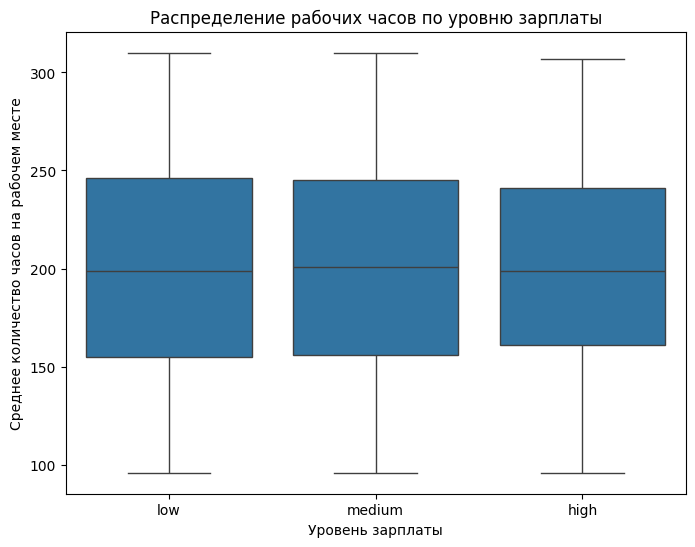

In [119]:
import pandas as pd
import scipy.stats as stats

### Разделение на группы
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']


### Проведение t-теста
t_test = stats.ttest_ind(low_salary, high_salary)
print(f"T-test: p-value = {t_test.pvalue:.4f}")

### Интерпретация результатов
if t_test.pvalue < 0.05:
    print("Вывод: Разница статистически значима (t-тест). Сотрудники с высоким окладом работают больше.")
else:
    print("Вывод: Нет статистически значимых различий.")

### Подкрепляем наши выводы визуально

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='salary', y='average_montly_hours', data = df)
plt.title("Распределение рабочих часов по уровню зарплаты")
plt.xlabel("Уровень зарплаты")
plt.ylabel("Среднее количество часов на рабочем месте")
plt.show()

Задание 8 - Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):


● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов


In [123]:
# Разделение данных на уволившихся и не уволившихся
left_employees = df[df['left'] == 1]
stayed_employees = df[df['left'] == 0]

# Функция для расчета и вывода показателей
def calculate_metrics(df, group_name):
    promotion_rate = df['promotion_last_5years'].mean() * 100
    avg_satisfaction = df['satisfaction_level'].mean()
    avg_projects = df['number_project'].mean()

    print(f"\nПоказатели для {group_name}:")
    print(f"1. Доля сотрудников с повышением за последние 5 лет: {promotion_rate:.2f}%")
    print(f"2. Средняя степень удовлетворенности: {avg_satisfaction:.3f}")
    print(f"3. Среднее количество проектов: {avg_projects:.2f}")

# Расчет для обеих групп
calculate_metrics(left_employees, "уволившихся сотрудников")
calculate_metrics(stayed_employees, "не уволившихся сотрудников")

# Дополнительно: сравнение в таблице
comparison = pd.DataFrame({
    'Группа': ['Уволившиеся', 'Оставшиеся'],
    'Доля повышений (%)': [
        left_employees['promotion_last_5years'].mean() * 100,
        stayed_employees['promotion_last_5years'].mean() * 100
    ],
    'Средняя удовлетворенность': [
        left_employees['satisfaction_level'].mean(),
        stayed_employees['satisfaction_level'].mean()
    ],
    'Среднее число проектов': [
        left_employees['number_project'].mean(),
        stayed_employees['number_project'].mean()
    ]
})

print("\nСравнительная таблица:")
print(comparison.to_string(index=False))


Показатели для уволившихся сотрудников:
1. Доля сотрудников с повышением за последние 5 лет: 0.53%
2. Средняя степень удовлетворенности: 0.440
3. Среднее количество проектов: 3.86

Показатели для не уволившихся сотрудников:
1. Доля сотрудников с повышением за последние 5 лет: 2.63%
2. Средняя степень удовлетворенности: 0.667
3. Среднее количество проектов: 3.79

Сравнительная таблица:
     Группа  Доля повышений (%)  Средняя удовлетворенность  Среднее число проектов
Уволившиеся            0.532064                   0.440098                3.855503
 Оставшиеся            2.625131                   0.666810                3.786664


Задание 9 - Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Загрузка и подготовка данных
data = pd.read_csv('HR.csv')

# Исключаем ненужные столбцы (department и salary)
X = data.drop(['left', 'department', 'salary'], axis=1)
y = data['left']

# 2. Разделение данных на обучающую и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Построение и обучение LDA модели
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 4. Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# 5. Оценка качества модели
print("Оценка качества модели LDA:\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", round(accuracy_score(y_test, y_pred), 4))

# Коэффициенты модели (важность признаков)
print("\nВажность признаков в модели:")
for feature, importance in zip(X.columns, lda.coef_[0]):
    print(f"{feature}: {importance:.4f}")

Оценка качества модели LDA:

Confusion Matrix:
[[3138  290]
 [ 809  263]]

Accuracy: 0.7558

Важность признаков в модели:
satisfaction_level: -1.1405
last_evaluation: 0.1052
number_project: -0.2603
average_montly_hours: 0.2272
time_spend_company: 0.3235
Work_accident: -0.3706
promotion_last_5years: -0.1579
